In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.) Importing Library

In [2]:
import pandas as pd

In [3]:
# Read the dataset
df = pd.read_csv('WELFake_Dataset.csv')
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


2.) Data Visualisation

In [4]:
# Check for any nulls
df['title'].isnull().sum()

558

In [5]:
df['title'].fillna(df.text, inplace = True)

In [6]:
# Check for any nulls
df['text'].isnull().sum()

39

In [7]:
df['text'].fillna(df.title, inplace = True)

In [8]:
# frequency of each label
df['label'].value_counts()

label
1    37106
0    35028
Name: count, dtype: int64

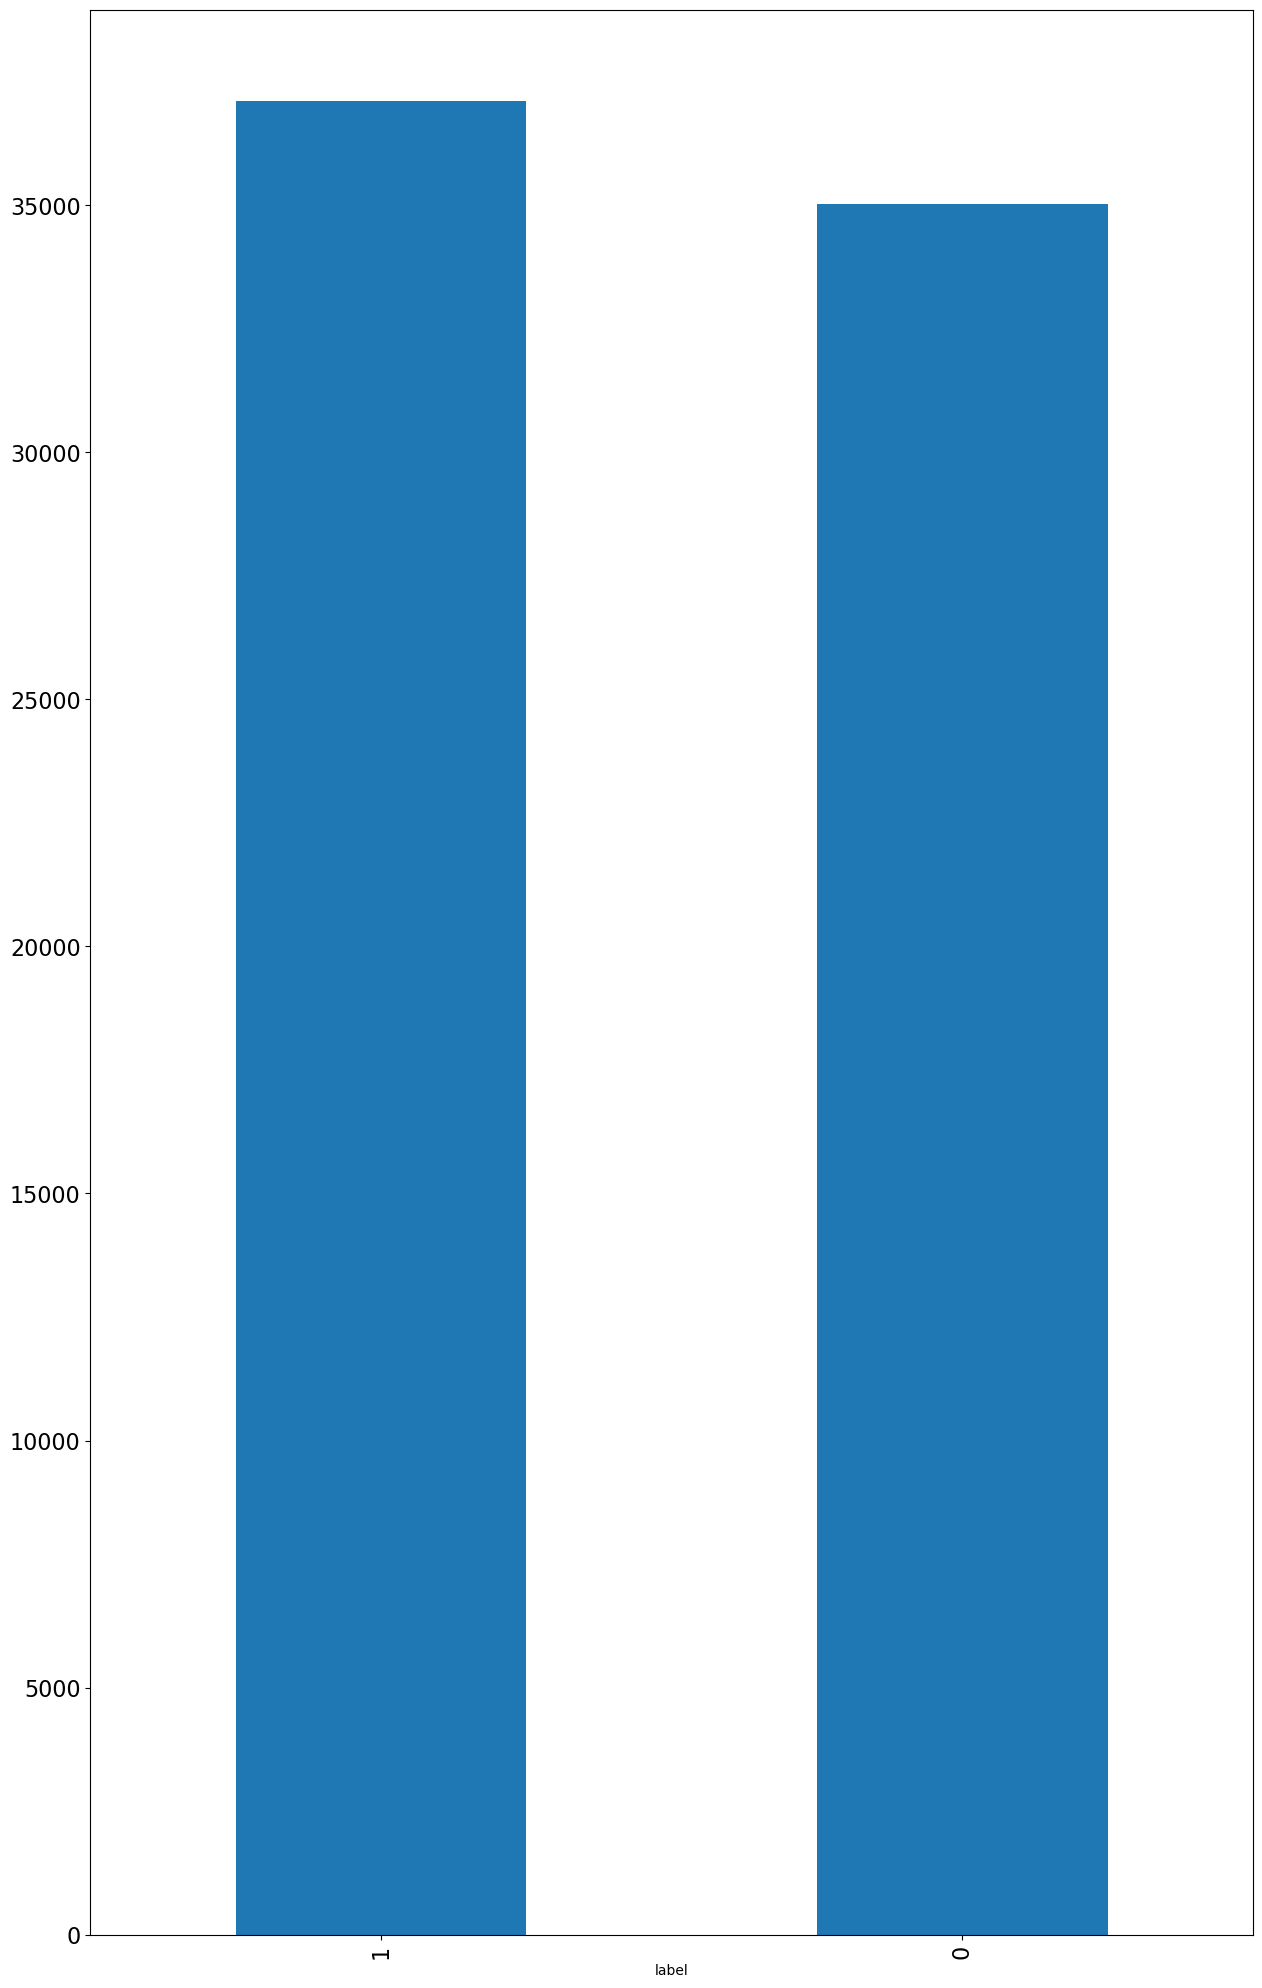

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of lable

df['label'].value_counts()[:40].plot(kind = 'bar', figsize=(15,25), fontsize=16);

3.)Text Prepossessing

In [10]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CL501_13\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CL501_13\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CL501_13\AppData\Roaming\nltk_data...


4.)Data Cleaning

In [11]:
import re
import string

# Cleaning of text data
def clean_text(text ):
    # remove punctuations
    text =''.join(word for word in text if word not in string.punctuation)
   # text = text.translate(str.maketrans('', '', None))
    # remove digits
    text1 = ''.join(w.lower() for w in text if not w.isdigit())
    # lower case
   # text2 = text1.lower()
    # remove escape characters
  #  REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    # replace REPLACE_BY_SPACE_RE symbols by space in text
   # text2 = REPLACE_BY_SPACE_RE.sub(None, None)
    return text1

2.A.)Tokenization,Lemmatization

In [12]:
# Lemmatization of text data
def lemmatize_text(text):
    wordlist = []
    lemmatizer = WordNetLemmatizer()
    # Sentence tokenization
    sentences = nltk.sent_tokenize(str(text))

    intial_sentences = sentences[0:1]
    final_sentences = sentences[len(sentences)-2: len(sentences)-1]

    # Word tokenization
    for sentence in intial_sentences:
        words = nltk.word_tokenize(sentence)
        for word in words:
            wordlist.append(word)

    for sentence in final_sentences:
        words = nltk.word_tokenize(sentence)
        for word in words:
            wordlist.append(word)

    return wordlist

In [13]:
# Apply the functions on title column

# Clean
df['title'] = df['title'].apply(lambda x: clean_text(x))
# Lemmatize
df['titele'] = df['title'].apply(lambda x: lemmatize_text(x))

In [14]:
# Apply the functions on title column

# Clean
df['text'] = df['text'].apply(lambda x: clean_text(x))
# Lemmatize
df['text'] = df['text'].apply(lambda x: lemmatize_text(x))

3) Vectorize Data Using:

a) CountVectorizer

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import nltk

df['title'] = df['title'].apply(lambda x: ' '.join(map(str, x)))
df['text'] = df['text'].apply(lambda x: ' '.join(map(str, x)))
df['Combined_Text'] = df['title'] + ' ' + df['text']

vectorizer = CountVectorizer(analyzer='word', stop_words='english',
                             ngram_range=(1, 3), max_df=0.75,
                             min_df=5, max_features=5000)

countMat = vectorizer.fit_transform(df['Combined_Text'])

feature_names = vectorizer.get_feature_names_out()
print(feature_names)


['abandon' 'abandoned' 'abc' ... 'по' 'что' 'это']


In [16]:
len(feature_names)

5000

In [17]:
print(countMat)

  (0, 819)	1
  (0, 1554)	1
  (0, 379)	1
  (0, 2990)	1
  (0, 2721)	1
  (0, 2846)	1
  (0, 571)	3
  (0, 4892)	9
  (0, 3180)	9
  (0, 965)	4
  (0, 1446)	1
  (0, 3534)	6
  (0, 4649)	1
  (0, 2946)	1
  (0, 4653)	5
  (0, 2403)	2
  (0, 4002)	2
  (0, 2736)	1
  (0, 2407)	4
  (0, 455)	10
  (0, 3075)	2
  (0, 471)	1
  (0, 2080)	1
  (0, 4474)	6
  (0, 3052)	1
  :	:
  (72133, 3320)	1
  (72133, 4045)	2
  (72133, 1387)	1
  (72133, 1877)	10
  (72133, 3871)	9
  (72133, 1878)	9
  (72133, 2398)	1
  (72133, 3299)	1
  (72133, 374)	2
  (72133, 3360)	1
  (72133, 2207)	1
  (72133, 409)	1
  (72133, 1876)	1
  (72133, 1371)	1
  (72133, 429)	1
  (72133, 3909)	1
  (72133, 430)	1
  (72133, 1058)	2
  (72133, 1356)	1
  (72133, 214)	1
  (72133, 3886)	1
  (72133, 3144)	1
  (72133, 4189)	2
  (72133, 1384)	1
  (72133, 1454)	2


Splitting up the dataset

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(countMat,
                                                    df['label'],
                                                    stratify=df['label'],
                                                    random_state=1)

In [19]:
print('Train_Set_Size:'+str(X_train.shape))
print('Test_Set_Size:'+str(X_test.shape))
print('Train_Set_Size:'+str(y_train.shape))
print('Test_Set_Size:'+str(y_test.shape))

Train_Set_Size:(54100, 5000)
Test_Set_Size:(18034, 5000)
Train_Set_Size:(54100,)
Test_Set_Size:(18034,)


In [20]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state=10,max_iter=10000)

best_model=logistic.fit(X_train, y_train)

y_pred = best_model.predict(X_test)


In [21]:
algorithm=[]
precision=[]
recall=[]
accuracys=[]

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      8757
           1       0.93      0.95      0.94      9277

    accuracy                           0.94     18034
   macro avg       0.94      0.94      0.94     18034
weighted avg       0.94      0.94      0.94     18034



In [23]:
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("Logistic Regression with CountVectorizer")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))
accuracys.append(accuracy_score(y_test,y_pred))

In [24]:
from sklearn import svm
from sklearn.metrics import accuracy_score
# Create an SVM classifier
clf = svm.SVC(max_iter=1000)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

C:\Users\CL501_13\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.7503049794831984


In [25]:
cm=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred,zero_division=0))
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("SVM with CountVectorizer")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))

              precision    recall  f1-score   support

           0       0.89      0.55      0.68      8757
           1       0.69      0.94      0.79      9277

    accuracy                           0.75     18034
   macro avg       0.79      0.74      0.74     18034
weighted avg       0.79      0.75      0.74     18034



In [26]:
accuracys.append(accuracy_score(y_test,y_pred))

Random Forest with Count Vectorizer

In [27]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=50,random_state=100)
# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")

Random Forest Accuracy: 0.9417766441166685


In [28]:
cm=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred,zero_division=0))
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("Random Forest with CountVectorizer")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))
accuracys.append(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8757
           1       0.93      0.96      0.94      9277

    accuracy                           0.94     18034
   macro avg       0.94      0.94      0.94     18034
weighted avg       0.94      0.94      0.94     18034



TFIDF

In [29]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CL501_13\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CL501_13\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CL501_13\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
data=pd.read_csv('WELFake_Dataset.csv')
data

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [32]:

import re
import string

def clean_text(text ):
    text =''.join(word for word in text if word not in string.punctuation)
    text1 = ''.join(w.lower() for w in text if not w.isdigit())
    return text1
# Lemmatization of text data
def lemmatize_text(text):
    wordlist = []
    lemmatizer = WordNetLemmatizer()
    # Sentence tokenization
    sentences = nltk.sent_tokenize(str(text))

    intial_sentences = sentences[0:1]
    final_sentences = sentences[len(sentences)-2: len(sentences)-1]

    # Word tokenization
    for sentence in intial_sentences:
        words = nltk.word_tokenize(sentence)
        for word in words:
            wordlist.append(word)

    for sentence in final_sentences:
        words = nltk.word_tokenize(sentence)
        for word in words:
            wordlist.append(word)

    return wordlist


In [33]:
data['title'].fillna(data.text, inplace = True)
data['text'].fillna(data.title, inplace = True)

In [34]:
# Apply the functions on Description column

# Clean
data['text'] = data['text'].apply(lambda x: clean_text(x))
# Lemmatize
data['text'] = data['text'].apply(lambda x: lemmatize_text(x))
# Apply the functions on Title column

# Clean
data['title'] = data['title'].apply(lambda x: clean_text(x))
# Lemmatize
data['title'] = data['title'].apply(lambda x: lemmatize_text(x))

In [35]:
#Setup Gdrive file download extention
!conda install -y gdown

Retrieving notices: ...working... done
Solving environment: ...working... unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: ...working... unsuccessful initial attempt using frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - gdown

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import nltk

# Assuming data is your DataFrame with 'title' and 'text' columns
# Concatenate 'title' and 'text' into a new column 'Combined_Text'
# Convert list elements to strings in 'title' and 'text' columns
data['title'] = data['title'].apply(lambda x: ' '.join(map(str, x)))
data['text'] = data['text'].apply(lambda x: ' '.join(map(str, x)))
data['Combined_Text1'] = data['title'] + ' ' + data['text']

# Text to TFIDF values
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english',
                             ngram_range=(1,3), max_df=0.75,
                             min_df=5, use_idf=True,
                             smooth_idf=True, max_features=5000)

# Fit and transform on the combined text
tfIdfMat = vectorizer.fit_transform(data['Combined_Text1'])

# Feature names
feature_names = vectorizer.get_feature_names_out()
print(feature_names)


['abandon' 'abandoned' 'abc' ... 'по' 'что' 'это']


In [38]:
len(feature_names)

5000

In [39]:
print(tfIdfMat)

  (0, 520)	0.04131610270599866
  (0, 4457)	0.05069870698698814
  (0, 3177)	0.047884494123983046
  (0, 3876)	0.048380330718305394
  (0, 455)	0.04522310502770585
  (0, 521)	0.22803084771290086
  (0, 457)	0.14927056433458583
  (0, 4647)	0.049226977157908317
  (0, 4893)	0.20176111186085938
  (0, 379)	0.029370332413903327
  (0, 2458)	0.03752300310476744
  (0, 2933)	0.01988245259623345
  (0, 4269)	0.028643799405313124
  (0, 1475)	0.031752331572459554
  (0, 3212)	0.03817006181481876
  (0, 232)	0.03456614916548874
  (0, 3214)	0.04441314452343779
  (0, 757)	0.04210146294716563
  (0, 4983)	0.03141870659009581
  (0, 2009)	0.02459420277214355
  (0, 3260)	0.02761237732954039
  (0, 535)	0.036493232540231714
  (0, 1719)	0.08402596931114831
  (0, 174)	0.04321959336340538
  (0, 1617)	0.03782124540182696
  :	:
  (72133, 2194)	0.06114351163454936
  (72133, 2879)	0.01888751167971796
  (72133, 3762)	0.063797031025635
  (72133, 582)	0.037302804854539996
  (72133, 3332)	0.026827743594208565
  (72133, 3844)	0

In [41]:
# Train-test split of the reduced data
X_train, X_test, y_train, y_test = train_test_split(tfIdfMat,
                                                    data['label'],
                                                    stratify=data['label'],
                                                    random_state=1)

In [42]:
print('Train_Set_Size:'+str(X_train.shape))
print('Test_Set_Size:'+str(X_test.shape))
print('Train_Set_Size:'+str(y_train.shape))
print('Test_Set_Size:'+str(y_test.shape))

Train_Set_Size:(54100, 5000)
Test_Set_Size:(18034, 5000)
Train_Set_Size:(54100,)
Test_Set_Size:(18034,)


Logistic Regression with TFIDF

In [43]:
# Classifier
clf = LogisticRegression(penalty= 'elasticnet', solver= 'saga',
                         l1_ratio=0.5, random_state=1).fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [44]:
# Performance measure
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test,y_pred)

print(classification_report(y_test, y_pred,zero_division=0))
cm=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred,zero_division=0))
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("Logistic Regression with TFIDF")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))
accuracys.append(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8757
           1       0.94      0.96      0.95      9277

    accuracy                           0.94     18034
   macro avg       0.94      0.94      0.94     18034
weighted avg       0.94      0.94      0.94     18034

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8757
           1       0.94      0.96      0.95      9277

    accuracy                           0.94     18034
   macro avg       0.94      0.94      0.94     18034
weighted avg       0.94      0.94      0.94     18034



# SVM Classifier with TFIDF

In [45]:
from sklearn import svm
from sklearn.metrics import accuracy_score
# Create an SVM classifier
clf = svm.SVC(max_iter=1000)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

C:\Users\CL501_13\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.9004657868470667


In [46]:
# Performance measure
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test,y_pred)

print(classification_report(y_test, y_pred,zero_division=0))
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("Support Vector Machine with TFIDF")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))
accuracys.append(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      8757
           1       0.88      0.93      0.91      9277

    accuracy                           0.90     18034
   macro avg       0.90      0.90      0.90     18034
weighted avg       0.90      0.90      0.90     18034



Random Forest Classifier with TFIDF

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=50,random_state=100)
# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")
cm = confusion_matrix(y_test,y_pred)

print(classification_report(y_test, y_pred,zero_division=0))
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("Random Forest with TFIDF")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))
accuracys.append(accuracy_score(y_test,y_pred))

Random Forest Accuracy: 0.9531440612176999
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      8757
           1       0.94      0.97      0.96      9277

    accuracy                           0.95     18034
   macro avg       0.95      0.95      0.95     18034
weighted avg       0.95      0.95      0.95     18034



# using word2vec

In [49]:
import gensim

In [51]:
import numpy as np

In [50]:
model=gensim.models.keyedvectors.load_word2vec_format("GoogleNews-vectors-negative300.bin",binary=True)

In [52]:
vocab = model.key_to_index

In [53]:
def embeddings(text):
  DIM = 300
  zero_vec = np.zeros(DIM)
  features = []
  for tokens in text:
    feat = np.zeros(DIM)
    count = 0 + 1e-5 #for DIV by 0 error
    for token in tokens:
      if token in model:
        feat += model[token]
        count += 1
    if(count !=0):
      features.append(feat/count)
    else:
      features.append(zero_vec)
  return features

In [54]:
data['title'] = data['title'].apply(lambda x: ' '.join(map(str, x)))
data['text'] = data['text'].apply(lambda x: ' '.join(map(str, x)))
data['Combined_Text2'] = data['title'] + ' ' + data['text']
data_vec=embeddings(data['Combined_Text2'])

In [55]:
print(len(data_vec))

72134


In [57]:
# Train-test split of the reduced data
X_train, X_test, y_train, y_test = train_test_split(data_vec,
                                                    data['label'],
                                                    stratify=data['label'],
                                                    random_state=1)

# Logistic Regression using Word2vec

In [60]:
# Classifier
clf = LogisticRegression(penalty= 'elasticnet', solver= 'saga',
                         l1_ratio=0.5, random_state=1).fit(X_train,y_train)

y_pred = clf.predict(X_test)
# Performance measure
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test,y_pred)

print(classification_report(y_test, y_pred,zero_division=0))
cm=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred,zero_division=0))
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("Logistic Regression with  Word2vec")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))


              precision    recall  f1-score   support

           0       0.69      0.67      0.68      8757
           1       0.70      0.71      0.70      9277

    accuracy                           0.69     18034
   macro avg       0.69      0.69      0.69     18034
weighted avg       0.69      0.69      0.69     18034

              precision    recall  f1-score   support

           0       0.69      0.67      0.68      8757
           1       0.70      0.71      0.70      9277

    accuracy                           0.69     18034
   macro avg       0.69      0.69      0.69     18034
weighted avg       0.69      0.69      0.69     18034



# SVM using Word2vec

In [62]:
from sklearn import svm
from sklearn.metrics import accuracy_score
# Create an SVM classifier
clf = svm.SVC(max_iter=1000)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred,zero_division=0))
cm=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred,zero_division=0))
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("SVM with Word2Vec")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))
accuracys.append(accuracy_score(y_test,y_pred))


C:\Users\CL501_13\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.5120328268825551
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8757
           1       0.51      1.00      0.68      9277

    accuracy                           0.51     18034
   macro avg       0.26      0.50      0.34     18034
weighted avg       0.26      0.51      0.35     18034

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8757
           1       0.51      1.00      0.68      9277

    accuracy                           0.51     18034
   macro avg       0.26      0.50      0.34     18034
weighted avg       0.26      0.51      0.35     18034



# Random Forest using Word2vec

In [63]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=50,random_state=100)
# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")
cm = confusion_matrix(y_test,y_pred)

print(classification_report(y_test, y_pred,zero_division=0))
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("Random Forest with  Word2vec")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))
accuracys.append(accuracy_score(y_test,y_pred))

Random Forest Accuracy: 0.7943329266940224
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      8757
           1       0.79      0.81      0.80      9277

    accuracy                           0.79     18034
   macro avg       0.79      0.79      0.79     18034
weighted avg       0.79      0.79      0.79     18034



In [73]:
df = pd.DataFrame({'algorithm':algorithm,'Precision': precision,'Recall': recall,'Accuracy': accuracys})

In [74]:
df

,algorithm,Precision,Recall,Accuracy
0,Logistic Regression with CountVectorizer,0.935742,0.935225,0.935511
1,SVM with CountVectorizer,0.790720,0.744764,0.750305
2,Random Forest with CountVectorizer,0.942376,0.941328,0.941777
3,Logistic Regression with TFIDF,0.944173,0.943416,0.943773
4,Support Vector Machine with TFIDF,0.902556,0.899469,0.900466
5,Random Forest with TFIDF,0.953776,0.952707,0.953144
6,Logistic Regression with Word2vec,0.690844,0.690508,0.512033
7,Logistic Regression with Word2vec,0.690844,0.690508,0.690000
8,SVM with Word2Vec,0.256628,0.497682,0.690000
9,Random Forest with Word2vec,0.794417,0.793795,0.794333
